# 1: Setup and Data Exploration

Author: Daniel Lusk

## Imports

In [62]:
import glob
import os

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rioxarray as rx
import utils

from rasterio.enums import Resampling
from tqdm.notebook import tqdm
from visualize import plot_traits

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Try/iNaturalist trait maps

### Visualize TRY/iNaturalist trait maps

First, let's look at the trait maps generated from TRY/iNaturalist observations by [Wolf, et al. (2022)](https://doi.org/10.1038/s41559-022-01904-x).

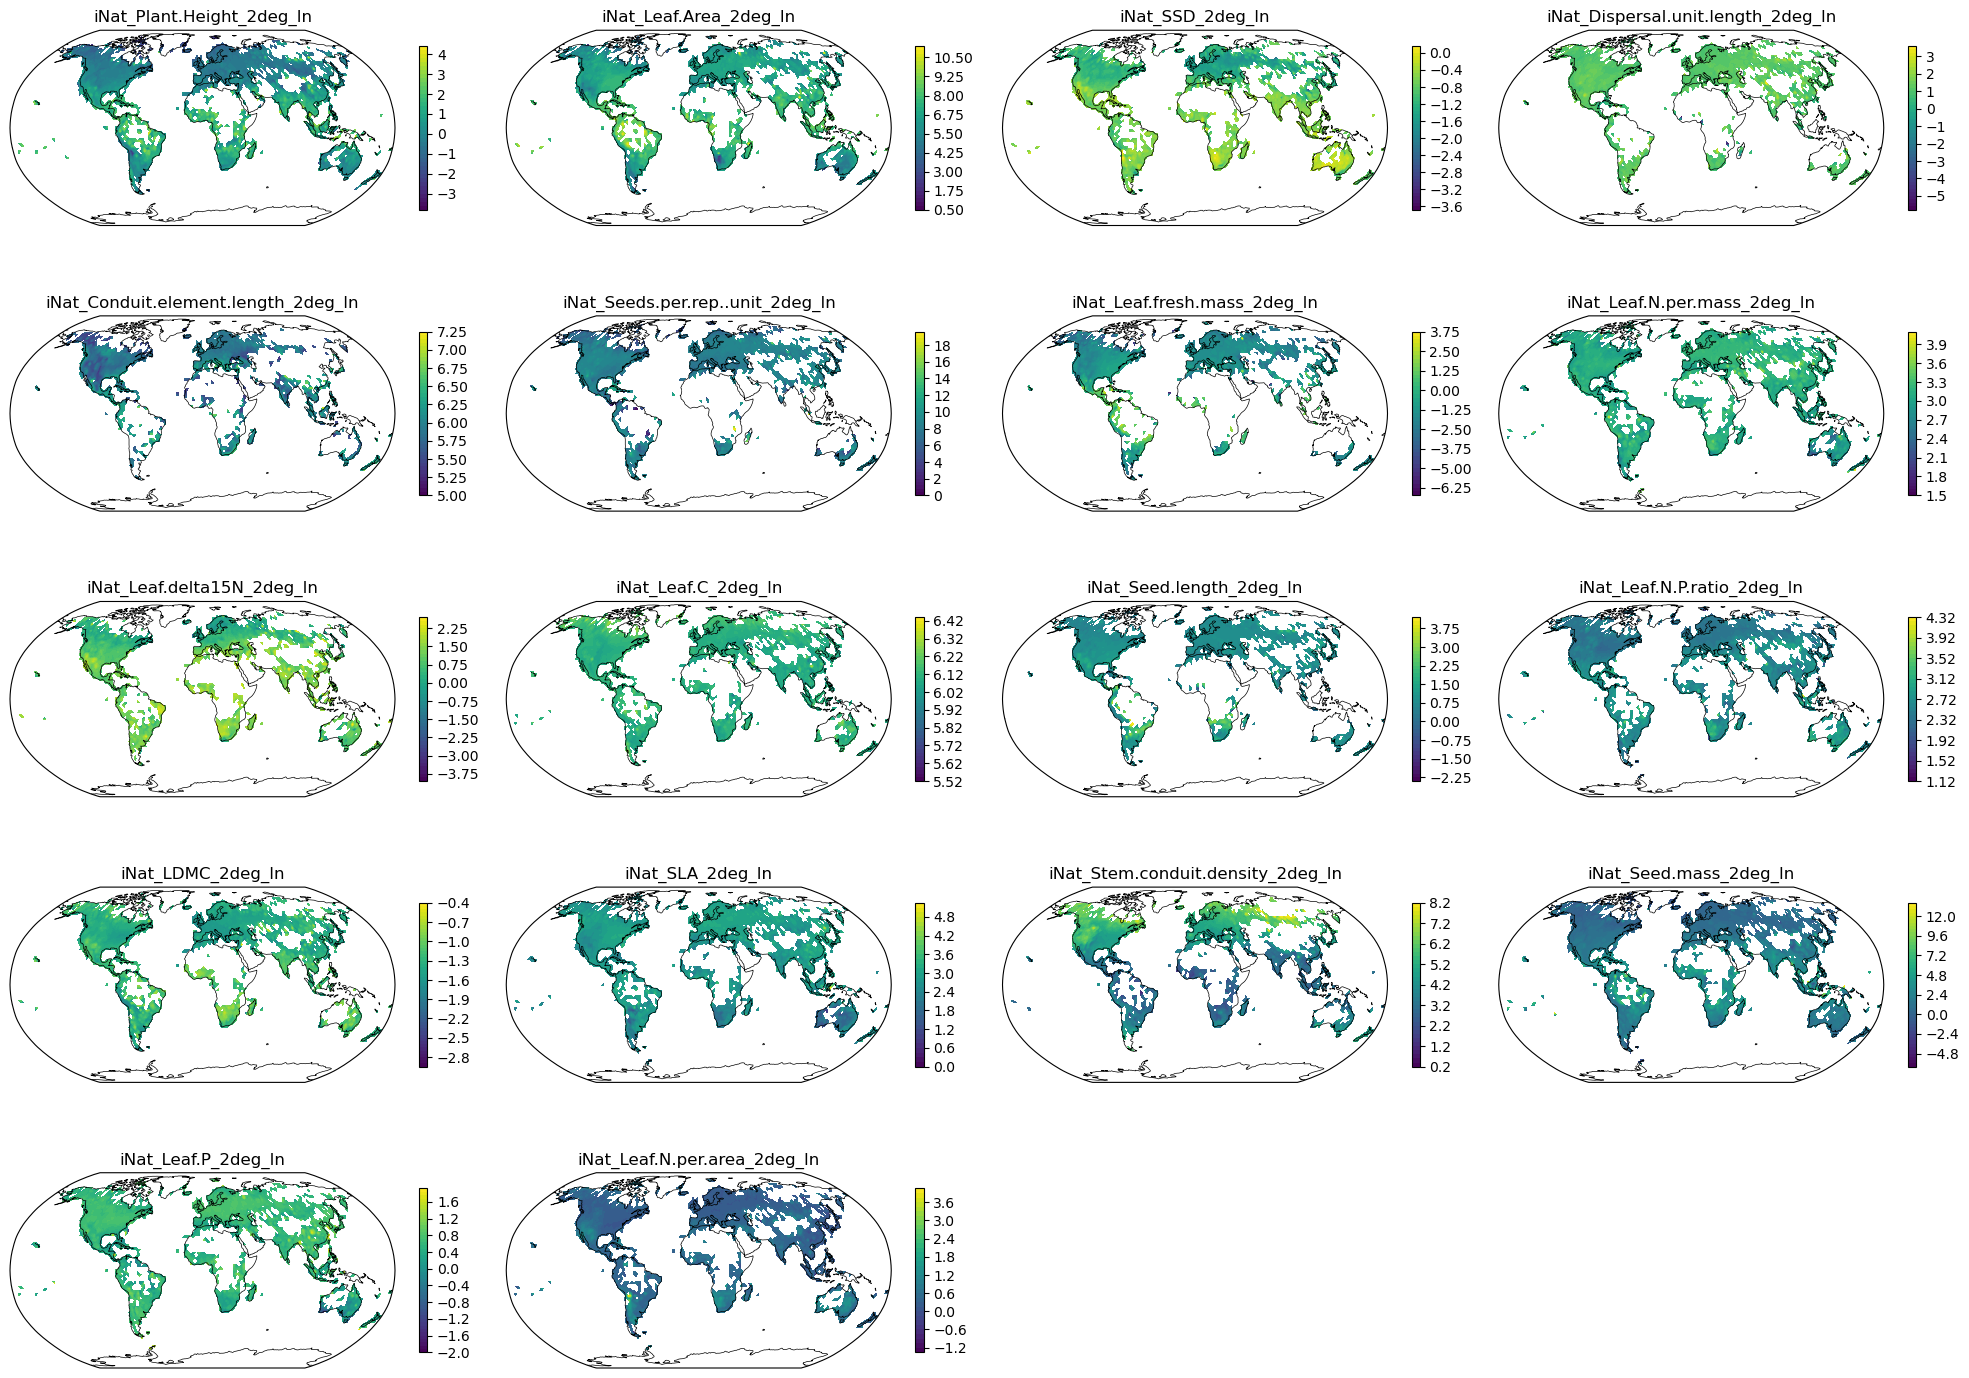

In [4]:
data_dir_2 = "iNaturalist_traits/maps_iNaturalist/2_deg/ln"
fns = glob.glob(os.path.join(data_dir_2, "*.tif"))

plot_traits(fns, 4)

### Convert to GeoDataFrames and merge

In [50]:
trait_05_data = "iNaturalist_traits/maps_iNaturalist/0.5_deg/ln/"
trait_fns = glob.glob(os.path.join(trait_05_data, "*.tif"))

trait_gdfs = []
for trait_fn in trait_fns:
    name = os.path.splitext(os.path.basename(trait_fn))[0] 
    gdf = utils.tif2gdf(trait_fn)
    gdf.name = name
    trait_gdfs.append(gdf)

trait_gdfs = utils.merge_gdfs(trait_gdfs)
trait_gdfs.head(5)

,y,x,geometry,band,spatial_ref,iNat_Leaf.delta15N_05deg_ln,iNat_Seeds.per.rep..unit_05deg_ln,iNat_Leaf.P_05deg_ln,iNat_Seed.mass_05deg_ln,iNat_Plant.Height_05deg_ln,...,iNat_SLA_05deg_ln,iNat_LDMC_05deg_ln,iNat_Conduit.element.length_05deg_ln,iNat_Seed.length_05deg_ln,iNat_Stem.conduit.density_05deg_ln,iNat_Leaf.N.per.mass_05deg_ln,iNat_Leaf.N.per.area_05deg_ln,iNat_SSD_05deg_ln,iNat_Leaf.N.P.ratio_05deg_ln,iNat_Dispersal.unit.length_05deg_ln
0,89.75,-179.75,POINT (-179.75000 89.75000),1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,89.75,-179.25,POINT (-179.25000 89.75000),1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,89.75,-178.75,POINT (-178.75000 89.75000),1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,89.75,-178.25,POINT (-178.25000 89.75000),1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,89.75,-177.75,POINT (-177.75000 89.75000),1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Load climate data

Load the tifs and resample to 0.5 degrees

In [83]:
rx.open_rasterio("./data/worldclim/bio/wc2.1_10m_bio_1.tif")

<xarray.DataArray (band: 1, y: 1080, x: 2160)>
[2332800 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -179.9 -179.8 -179.6 -179.4 ... 179.6 179.7 179.9
  * y            (y) float64 89.92 89.75 89.58 89.42 ... -89.58 -89.75 -89.92
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  30.987640380859
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  -54.724353790283
    STATISTICS_STDDEV:   nan
    _FillValue:          -3.4e+38
    scale_factor:        1.0
    add_offset:          0.0

In [81]:
bio_data = "./data/worldclim/bio"
bio_fns = glob.glob(os.path.join(bio_data, "*.tif"))

bios = []
for bio_fn in bio_fns:
    name = os.path.splitext(os.path.basename(bio_fn))[0]
    bio = rx.open_rasterio(bio_fn, masked=True)
    bio.name = name
    bios.append(bio)

scale_factor = 1/3
bios = [utils.resample_raster(bio, scale_factor) for bio in bios]

Convert to GeoDataFrames and merge

In [82]:
bio_gdfs = utils.merge_gdfs([utils.tif2gdf(bio) for bio in bios])
bio_gdfs.head(5)

,y,x,geometry,band,spatial_ref,wc2.1_10m_bio_5,wc2.1_10m_bio_15,wc2.1_10m_bio_17,wc2.1_10m_bio_4,wc2.1_10m_bio_14,...,wc2.1_10m_bio_11,wc2.1_10m_bio_1,wc2.1_10m_bio_10,wc2.1_10m_bio_8,wc2.1_10m_bio_9,wc2.1_10m_bio_16,wc2.1_10m_bio_18,wc2.1_10m_bio_12,wc2.1_10m_bio_3,wc2.1_10m_bio_7
0,89.75,-179.75,POINT (-179.75000 89.75000),1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,89.75,-179.25,POINT (-179.25000 89.75000),1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,89.75,-178.75,POINT (-178.75000 89.75000),1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,89.75,-178.25,POINT (-178.25000 89.75000),1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,89.75,-177.75,POINT (-177.75000 89.75000),1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Load monthly MODIS products for 2000

In [ ]:
# TODO: Load monthly MODIS products for year of 2000-01